# Data visualization 

here we visualize the crimes

reference from: http://aasa.ut.ee/Rspatial/04b_session.html

### Location of crimes

In [1]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

estonia = geopandas.read_file("../data/map/maakond_20191201.shp")
data = pd.read_csv('../data/data_cleaned.csv',  delimiter=',', header=0)


data.head()



,vehicle_type,vehicle_country,vehicle_brand,vehicle_year,age_group,infraction,x,y,weekday,road_type,infraction_seriousness,gender
0,car,EST,MITSUBISHI,2000,18-25,no_license,6591249.5,548749.5,monday,street,misdemeanour,M
1,car,EST,RENAULT,2006,65-,dui,6603249.5,545249.5,monday,street,felony,M
2,car,EST,ŠKODA,2017,55-64,speeding,6472249.5,660249.5,monday,street,misdemeanour,M
3,car,EST,VOLKSWAGEN,2004,26-34,dui,6443749.5,567749.5,monday,street,felony,M
4,car,EST,TOYOTA,2012,45-54,traffic_violation,6587749.5,537249.5,monday,street,misdemeanour,M


### All infractions
it's red, from the blood caused by the traffic accidents!

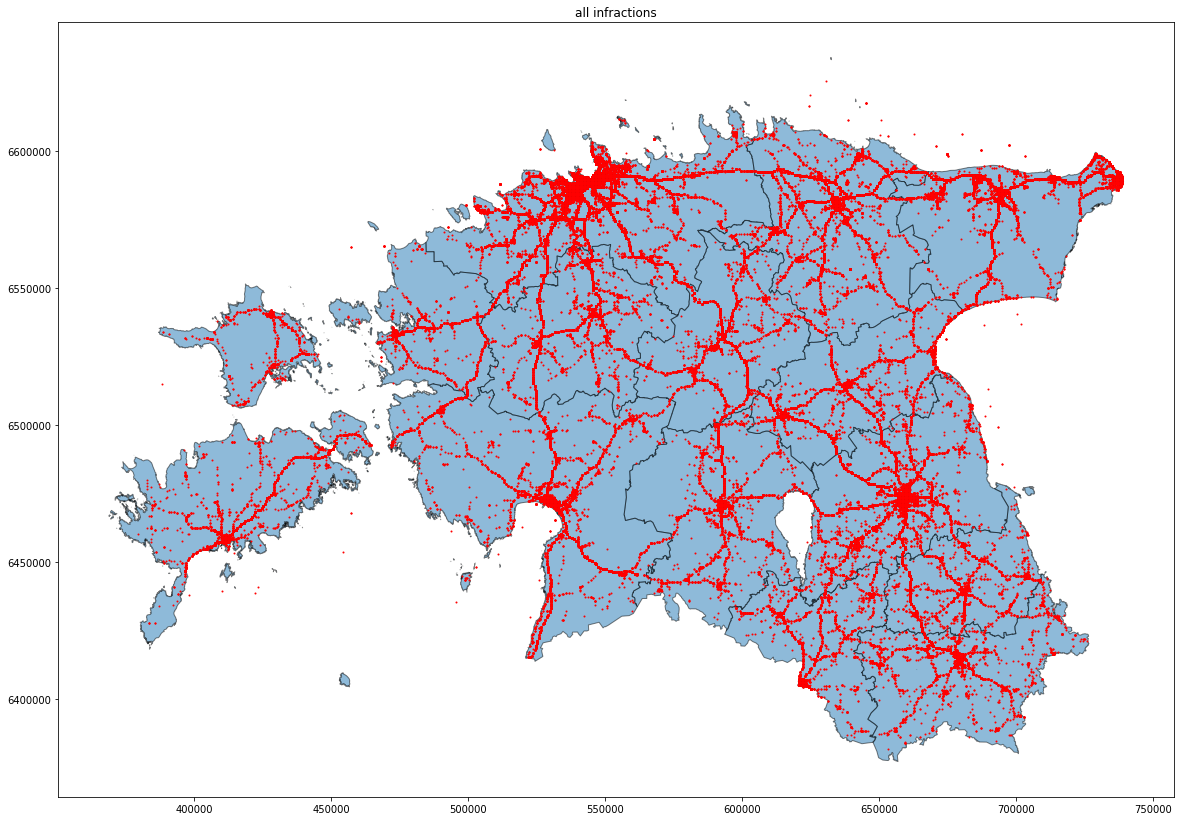

In [2]:

gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.y, data.x))


ax_mono = estonia.plot(figsize=(20,20), alpha=0.5, edgecolor='k')
ax_mono.set_title('all infractions')
gdf.plot(ax=ax_mono, color='r', markersize=1)

plt.savefig('../images/estonia_red.png', bbox_inches='tight')


### Infractions by color
here's some color. 

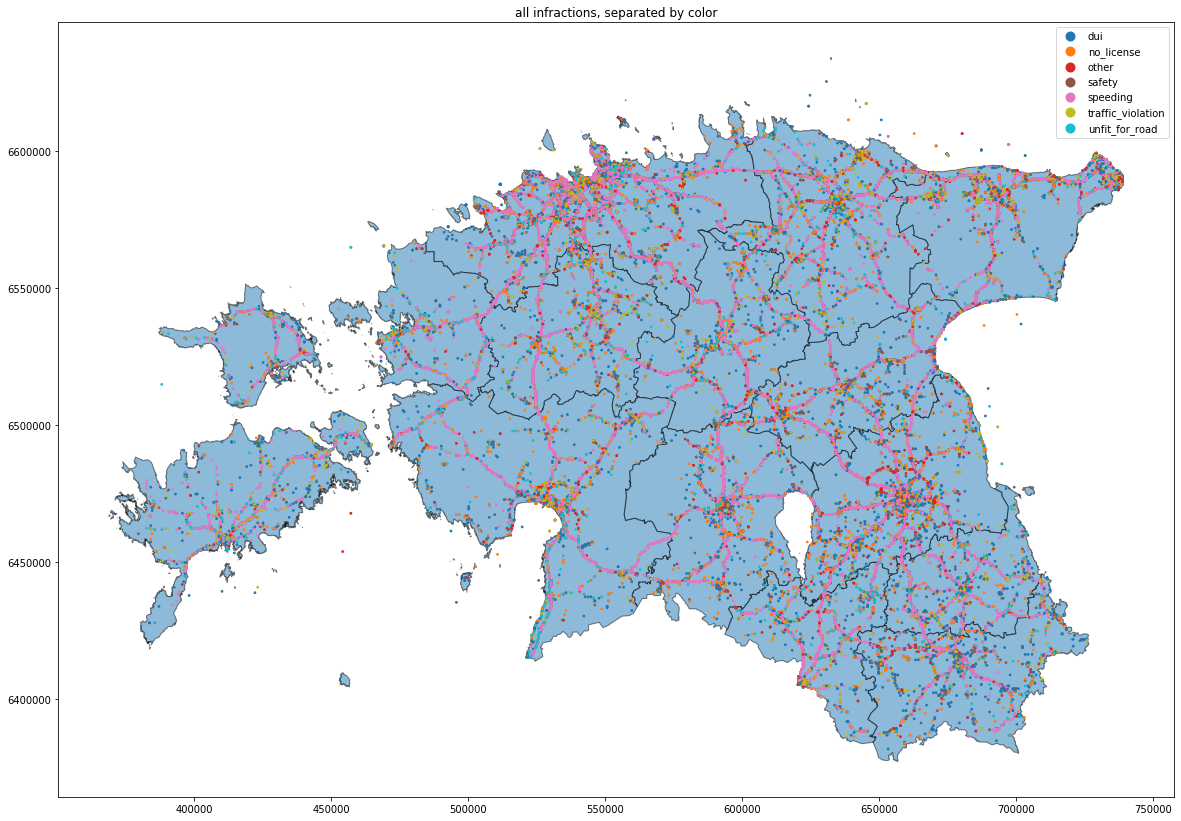

In [3]:
ax_multi = estonia.plot(figsize=(20,20), alpha=0.5, edgecolor='k')
ax_multi.set_title('all infractions, separated by color')

color_plot = gdf.plot(column='infraction', ax=ax_multi, legend=True, markersize=3) 

plt.savefig('../images/estonia_infractions.png', bbox_inches='tight')


### Infractions all separated


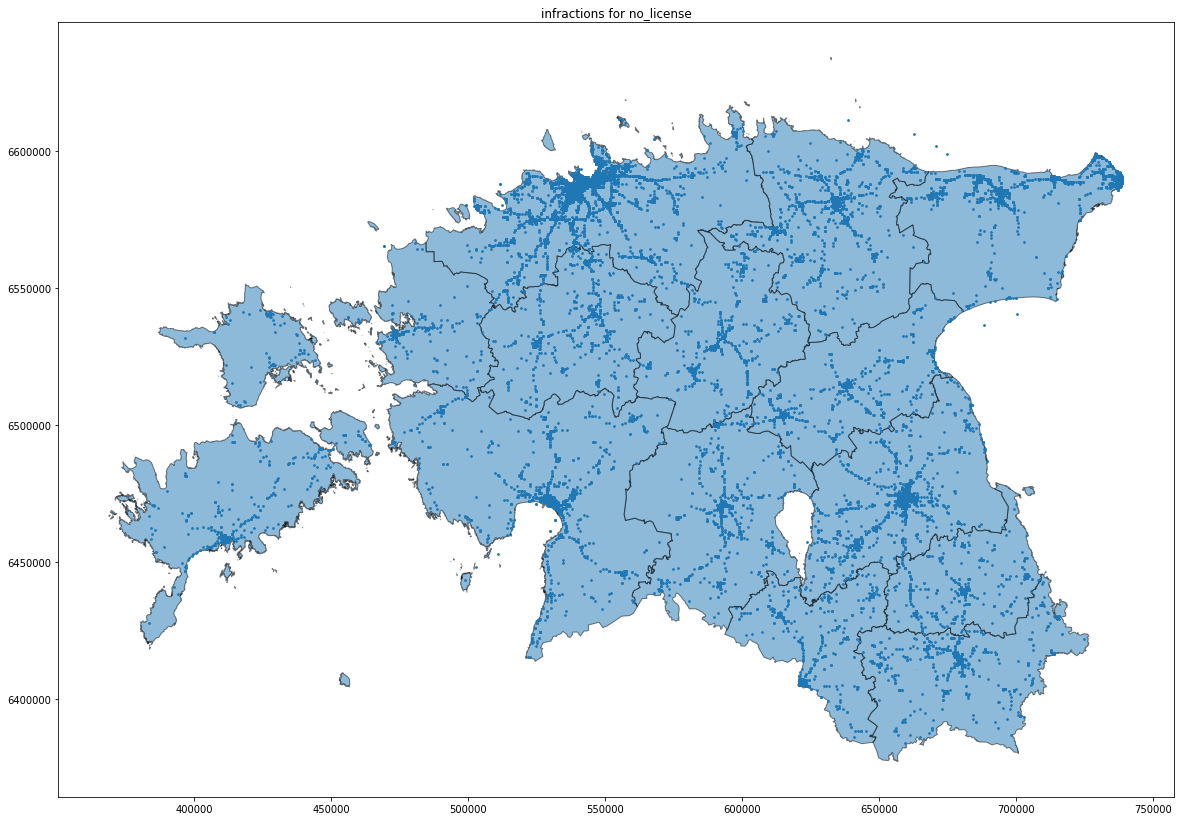

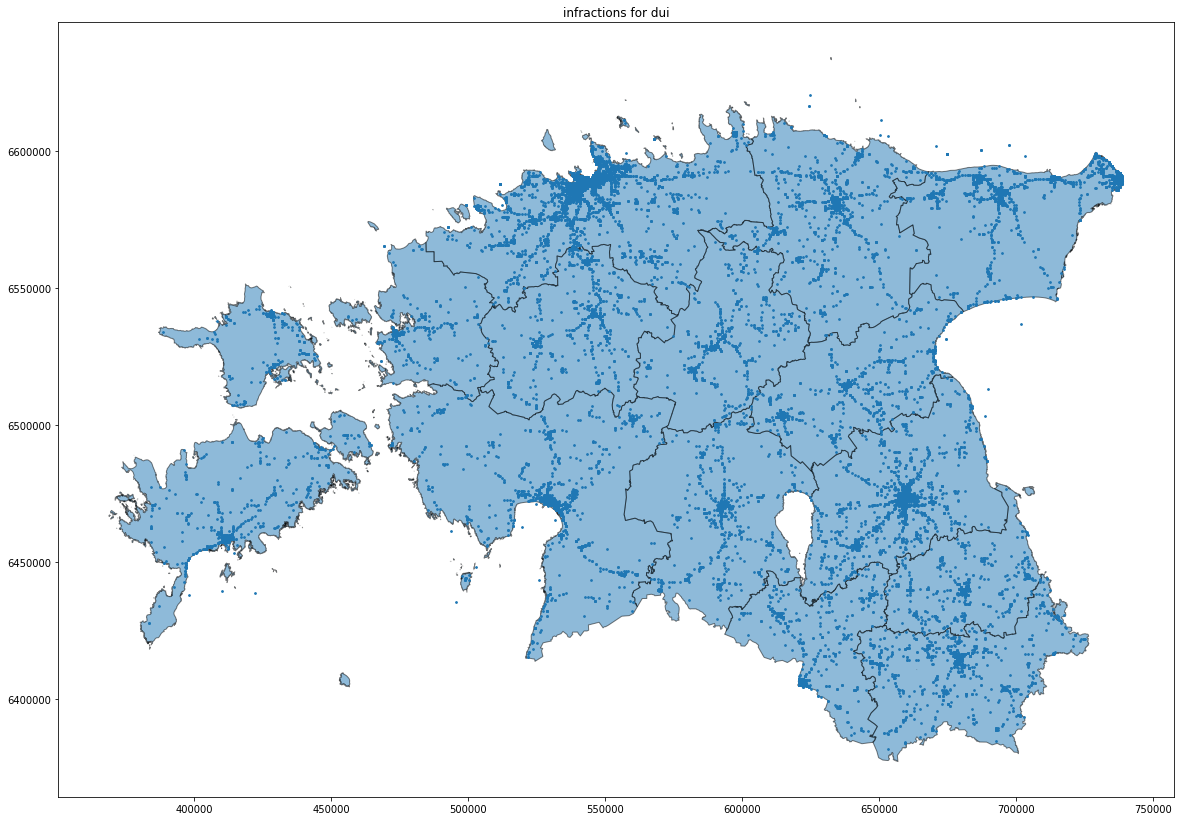

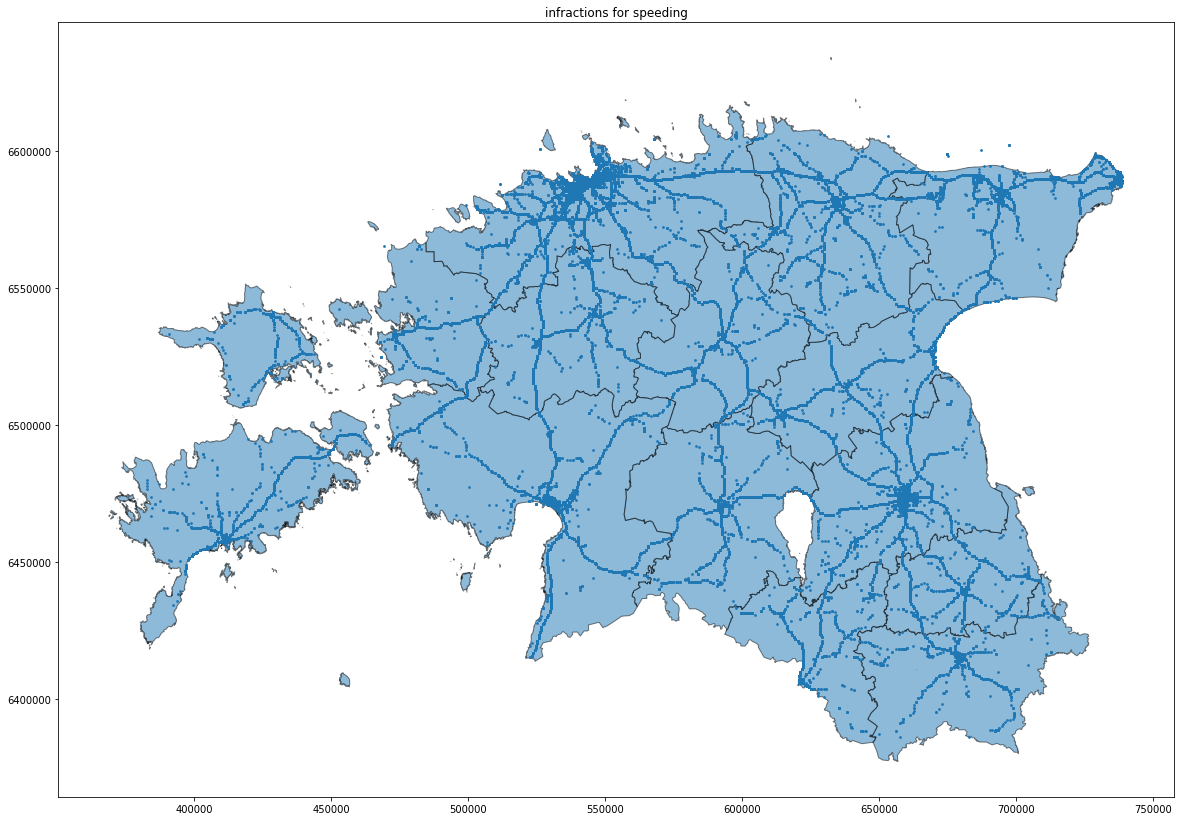

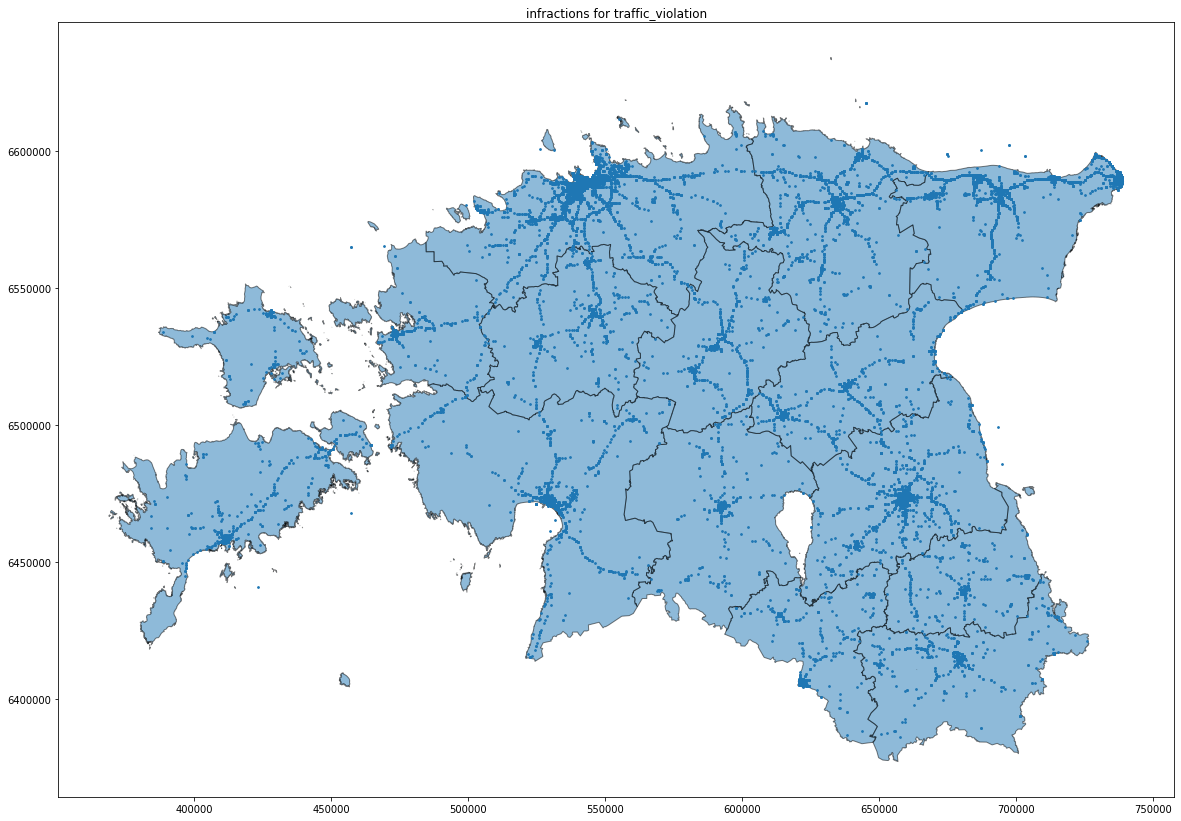

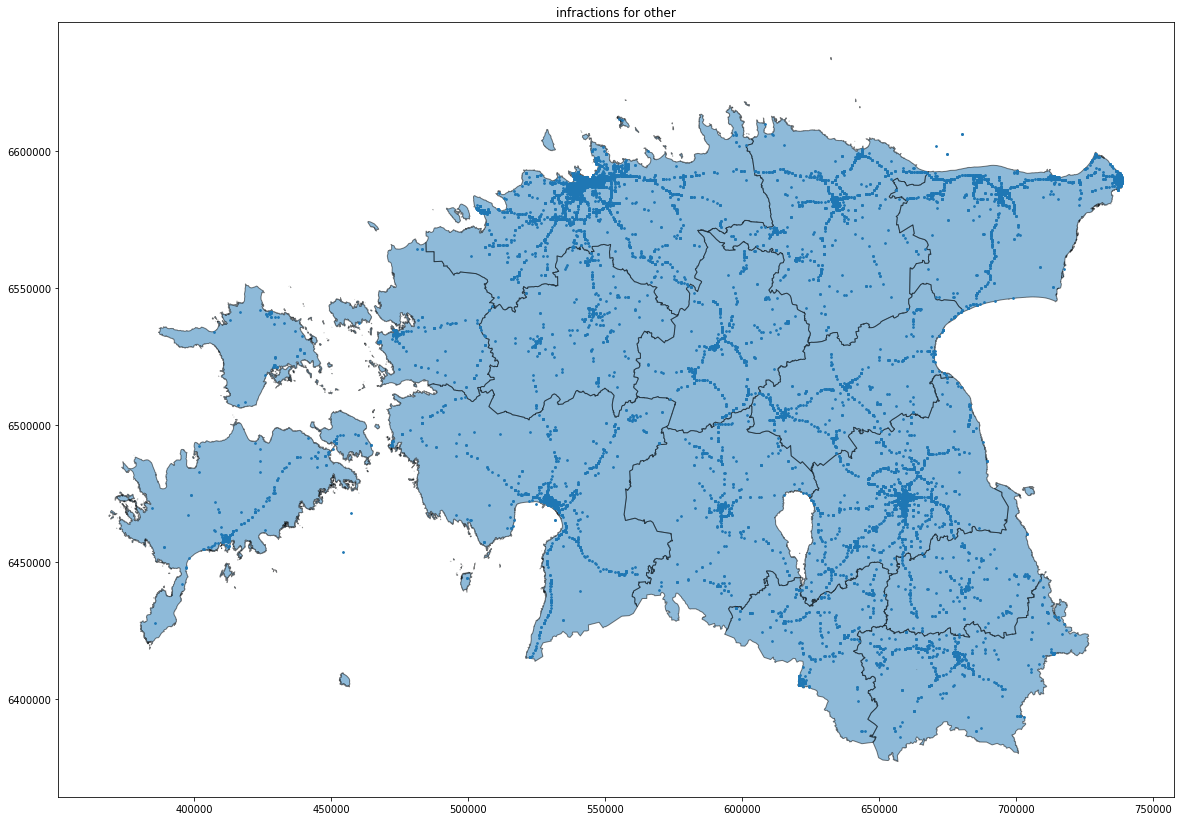

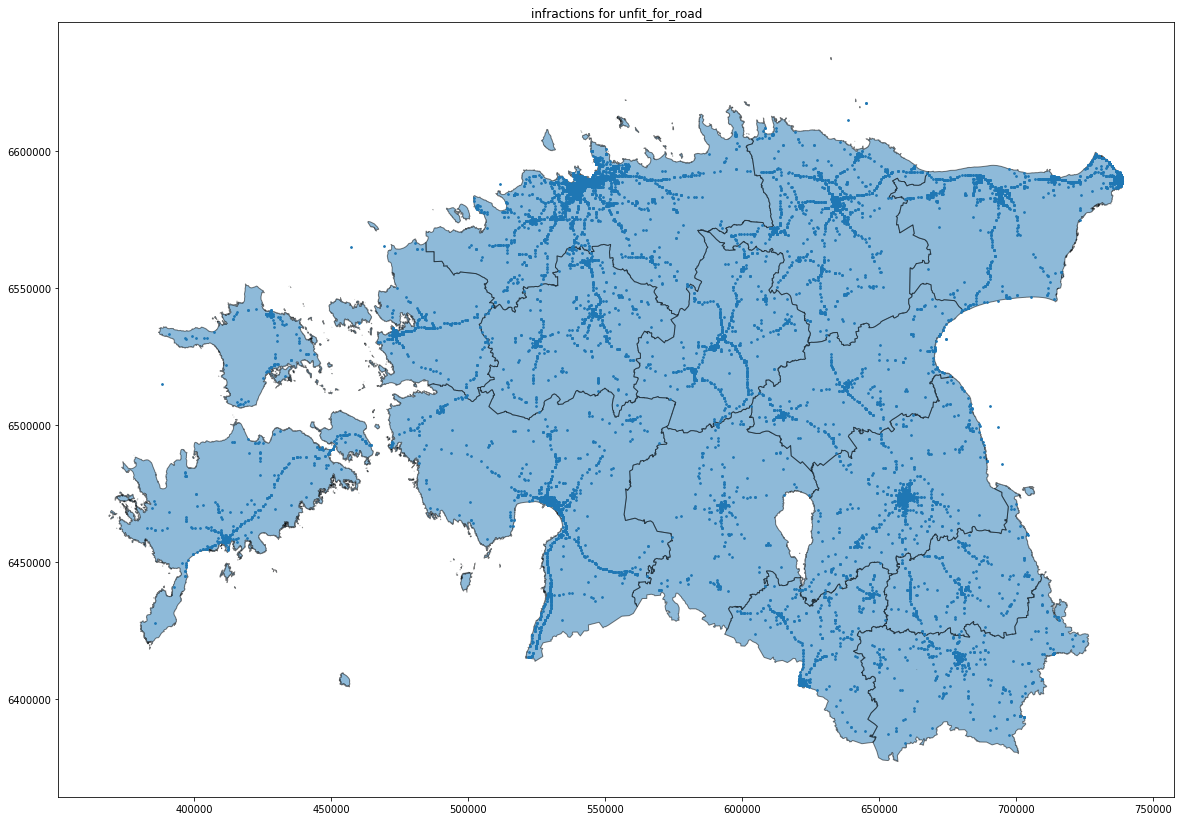

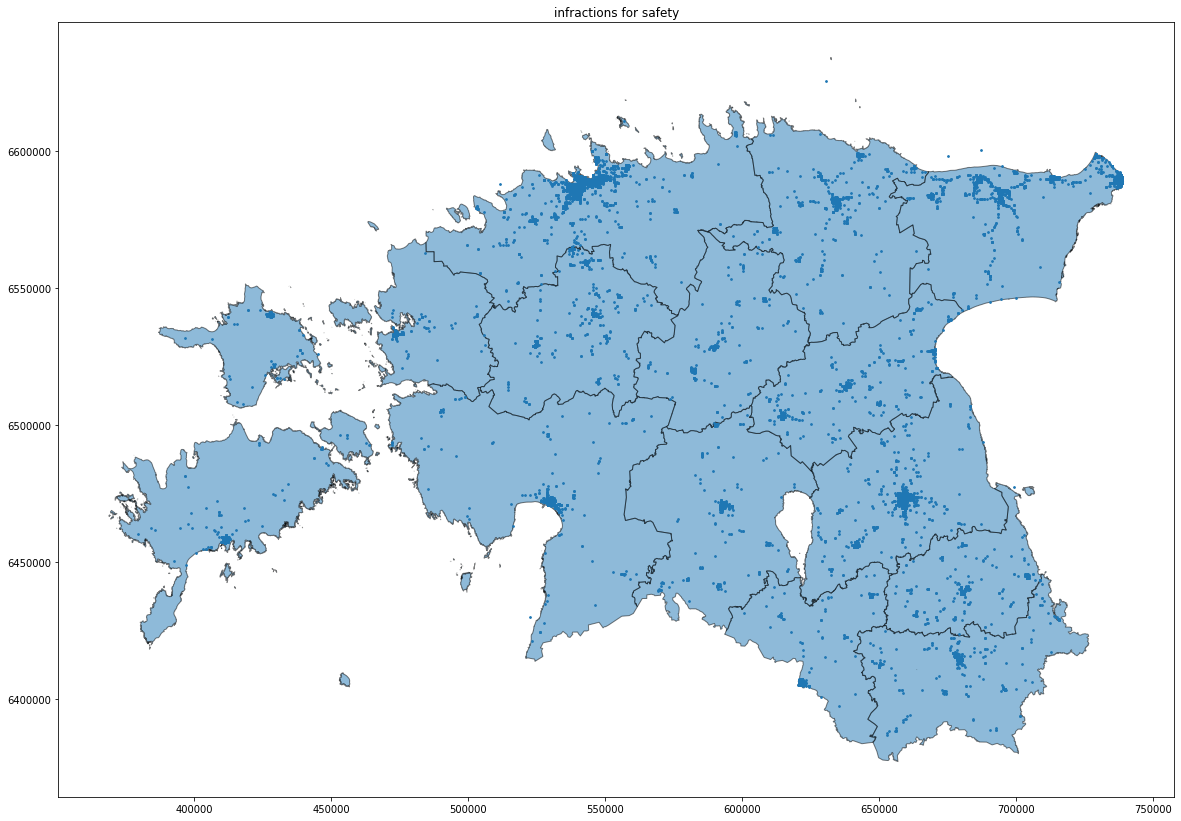

In [4]:
for i in gdf['infraction'].unique():
    ax_infraction = estonia.plot(figsize=(20,20), alpha=0.5, edgecolor='k')
    ax_infraction.set_title('infractions for '+i)
    gdf[gdf['infraction'] == i].plot(ax=ax_infraction, legend=True, markersize=3) 
    plt.savefig('../images/estonia_'+i+'_infractions.png', bbox_inches='tight')

### Heatmap for all infractions

In [ ]:
import geoplot


ax_heat = geoplot.kdeplot(
    gdf, shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())

geoplot.polyplot(estonia, ax=ax, zorder=1)

IllegalArgumentException: Points of LinearRing do not form a closed linestring
